# Automated EDA Tool

This is a demo to test Individual Agents as well as the final Orchestration Report Generation Layer.

### 1. Individual Agent Testing:
- **Data Cleaning Agent**
- **Data Visualisation Agent**
- **Wrapper Visualisation Agent with Observations**
- **EDA Feature Engineering Agent**
- **Model Recommendation Agent**
- **Model Recommended Evaluation Layer**

### 2. Orchestration and final Report Generation


# Individual Agent Testing

## Data Cleaning Agent

In [ ]:
# Libraries
from langchain_openai import ChatOpenAI
import os
import pandas as pd

from DataProbe.agents.data_cleaning_agent import DataCleaningAgent

In [ ]:
# * Setup
MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

llm = ChatOpenAI(model = MODEL)

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x15782b830>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x157803620>, root_client=<openai.OpenAI object at 0x10302d3a0>, root_async_client=<openai.AsyncOpenAI object at 0x137cc1b80>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [6]:
df_bikes = pd.read_csv('data/bike_sales_data.csv')
df_bikes

,date,bike_model,price,quantity_sold,extended_sales
0,2021-01-01,Commuter Swift,495,23,11385
1,2021-01-01,Urban Rider,350,19,6650
2,2021-01-01,City Cruiser,400,19,7600
3,2021-01-01,Mountain Trail Pro,1250,11,13750
4,2021-01-01,Gravel Explorer,2200,9,19800
...,...,...,...,...,...
13144,2024-12-31,Gravel Explorer,2200,22,48400
13145,2024-12-31,Roadster GT,2900,11,31900
13146,2024-12-31,Carbon Storm,5000,5,25000
13147,2024-12-31,Titanium Falcon,7500,6,45000


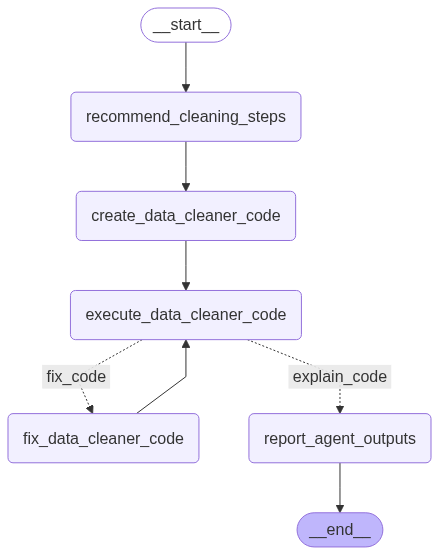

In [8]:
data_cleaning_agent = DataCleaningAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH
)

data_cleaning_agent

In [9]:
data_cleaning_agent.invoke_agent(
    data_raw=df_bikes,
    user_instructions="Don't remove outliers when cleaning the data.",
    max_retries=3,
    retry_count=0
)  

---DATA CLEANING AGENT----
    * RECOMMEND CLEANING STEPS
    * CREATE DATA CLEANER CODE
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_eda_tool/ai-data-science-team_clean/logs/data_cleaner.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS


In [10]:
response = data_cleaning_agent.get_response()

list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'data_cleaned',
 'all_datasets_summary',
 'data_cleaner_function',
 'data_cleaner_function_path',
 'data_cleaner_file_name',
 'data_cleaner_function_name',
 'data_cleaner_error',
 'max_retries',
 'retry_count']

In [11]:
df_cleaned_bikes = data_cleaning_agent.get_data_cleaned()
df_cleaned_bikes

,date,bike_model,price,quantity_sold,extended_sales
0,2021-01-01,Commuter Swift,495,23,11385
1,2021-01-01,Urban Rider,350,19,6650
2,2021-01-01,City Cruiser,400,19,7600
3,2021-01-01,Mountain Trail Pro,1250,11,13750
4,2021-01-01,Gravel Explorer,2200,9,19800
...,...,...,...,...,...
13144,2024-12-31,Gravel Explorer,2200,22,48400
13145,2024-12-31,Roadster GT,2900,11,31900
13146,2024-12-31,Carbon Storm,5000,5,25000
13147,2024-12-31,Titanium Falcon,7500,6,45000


In [12]:
df_cleaned_bikes.to_csv('processed_data/bike_sales_data_cleaned.csv')

In [13]:
data_cleaning_agent.get_data_cleaner_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_cleaning_agent
# Time Created: 2025-05-22 13:13:55

def data_cleaner(data_raw):
    import pandas as pd
    import numpy as np


    # Convert the 'date' column to datetime type
    data_raw['date'] = pd.to_datetime(data_raw['date'])

    # Check for duplicates and remove them
    data_raw.drop_duplicates(inplace=True)
    
    # The DataFrame is already free of missing values, so no need for imputations or removals
    
    # Finally, returning the cleaned DataFrame
    return data_raw
```

In [14]:
data_cleaning_agent.get_recommended_cleaning_steps(markdown=True)

# Recommended Data Cleaning Steps:
Here are the recommended steps to clean and preprocess the provided dataset, tailored to the characteristics of the data and considering the user instructions:

1. **Convert columns to the correct data type**:
   - Ensure that the `date` column is converted from an object to a datetime type to facilitate date-based operations.
   ```python
   df['date'] = pd.to_datetime(df['date'])
   ```
   - The other columns (`bike_model`, `price`, `quantity_sold`, `extended_sales`) are already in appropriate types; no changes are needed here.

2. **Check for missing values**:
   - Review the missing value statistics for each column. Since all columns have 0% missing values, no action is needed.

3. **Remove columns with excessive missing values**:
   - As a continuation of step 2, since no columns have more than 40% missing values, no columns will be removed.

4. **Impute missing values**:
   - There are no missing values to impute, so this step can be skipped.

5. **Remove duplicate rows**:
   - Check for duplicate rows and remove them if any are found. This can ensure data quality.
   ```python
   df.drop_duplicates(inplace=True)
   ```

6. **Remove rows with missing values**:
   - Since there are no missing values, this step is not applicable.

7. **Analyze for unit inconsistencies**:
   - Since there are no apparent inconsistencies in units (i.e., all numeric columns appear to be in consistent units according to the datasets provided), this step can be considered complete.

8. **Further analysis for additional cleaning needs**: 
   - Any additional steps would depend on analyzing the distribution of data in the numeric columns for potential corrections, but given the user instruction not to remove outliers, the normalization of these might also be unnecessary in the absence of any obvious issues in the data quality.

In conclusion, the following steps are necessary and beneficial for cleaning the dataset, considering the specific characteristics of the data and user instructions:
- Data types have been addressed.
- There are no missing value issues or duplicates.
- No further actions are required based on the dataset summary provided.

**Final Note:** No additional steps are required beyond those listed above.

## Data Visualization Agent

In [ ]:
from langchain_openai import ChatOpenAI
import os
import pandas as pd

from DataProbe.agents.data_visualization_agent import DataVisualizationAgent

In [ ]:
# * Setup
MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

llm = ChatOpenAI(model = MODEL)

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x15a049af0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x13f9026c0>, root_client=<openai.OpenAI object at 0x13a896de0>, root_async_client=<openai.AsyncOpenAI object at 0x10c22cec0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

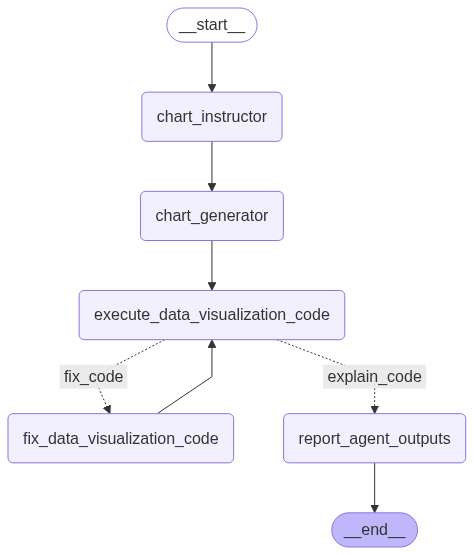

In [3]:
data_visualization_agent = DataVisualizationAgent(
    model = llm,
    log = LOG,
    log_path = LOG_PATH
)

data_visualization_agent

In [4]:
df_cleaned = pd.read_csv('processed_data/bike_sales_data_cleaned.csv')
df_cleaned

,Unnamed: 0,date,bike_model,price,quantity_sold,extended_sales
0,0,2021-01-01,Commuter Swift,495,23,11385
1,1,2021-01-01,Urban Rider,350,19,6650
2,2,2021-01-01,City Cruiser,400,19,7600
3,3,2021-01-01,Mountain Trail Pro,1250,11,13750
4,4,2021-01-01,Gravel Explorer,2200,9,19800
...,...,...,...,...,...,...
13144,13144,2024-12-31,Gravel Explorer,2200,22,48400
13145,13145,2024-12-31,Roadster GT,2900,11,31900
13146,13146,2024-12-31,Carbon Storm,5000,5,25000
13147,13147,2024-12-31,Titanium Falcon,7500,6,45000


In [5]:
data_visualization_agent.invoke_agent(
    data_raw=df_cleaned, 
    user_instructions="What are the most popular bikes sold?",
    max_retries=3,
    retry_count=0,
)

---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_eda_tool/ai-data-science-team_clean/logs/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS


In [6]:
response = data_visualization_agent.get_response()

list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'plotly_graph',
 'all_datasets_summary',
 'data_visualization_function',
 'data_visualization_function_path',
 'data_visualization_function_file_name',
 'data_visualization_function_name',
 'data_visualization_error',
 'max_retries',
 'retry_count']

In [7]:
data_visualization_agent.get_plotly_graph()

In [4]:
from langchain_openai import ChatOpenAI
from ai_data_science_team.multiagents.wrapper_data_visualisation_agent import DataVisualizationWrapperAgent

In [ ]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

llm = ChatOpenAI(model = MODEL)

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x16a4bb590>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x16a4c1a90>, root_client=<openai.OpenAI object at 0x11a6c4c20>, root_async_client=<openai.AsyncOpenAI object at 0x16a4bb5f0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [ ]:
df_cleaned = pd.read_csv('data/air_condition_dataset_cleaned.csv')
df_cleaned

,Unnamed: 0,Brand_name,TOn,Condenser_Coil,Power_Consumption,RefrigeranT,Noise_level,STAR,Ratings,Price,Image_url
0,0,Haier,1,Copper,704.00,R-32,26 dB,0.0,0,27294.0,https://rukminim1.flixcart.com/image/312/312/l...
1,1,Daikin,1.5,Alloy,1304.00,R-32,42 dB,4.2,0,38999.0,https://rukminim1.flixcart.com/image/312/312/l...
2,2,Croma,1.5,Copper,1570.00,R - 32,49 dB,3.8,75,28490.0,https://rukminim1.flixcart.com/image/312/312/l...
3,3,Panasonic,1,Copper,1095.00,R-32,45 dB,4.3,10156,32999.0,https://rukminim1.flixcart.com/image/312/312/l...
4,4,MarQ,By,Copper,712.59,R-32,40 dB,4.0,642,27490.0,https://rukminim1.flixcart.com/image/312/312/k...
...,...,...,...,...,...,...,...,...,...,...,...
196,271,Lloyd,1.5,Copper,1440.00,R-32,57 dB,4.1,0,34890.0,https://rukminim1.flixcart.com/image/312/312/k...
197,272,Hitachi,2,Copper,2350.00,R410A,37 dB,4.2,2029,49500.0,https://rukminim1.flixcart.com/image/312/312/k...
198,273,CARRIER,1.5,Copper,1550.00,R32,58 dB,4.2,810,32999.0,https://rukminim1.flixcart.com/image/312/312/k...
199,274,LIVPURE,1,Copper,1080.00,R32,45 dB,4.2,2586,38990.0,https://rukminim1.flixcart.com/image/312/312/k...


In [7]:
viz_wrapper = DataVisualizationWrapperAgent(
    model=llm,
    n_samples=30,
    max_visualizations=10,
    log=True
)

In [8]:
viz_wrapper.invoke_agent(
    data_raw=df_cleaned,
    user_instructions="Help me gain a complete picture about the data"
)

---DATA VISUALIZATION WRAPPER AGENT----
    * ANALYZE DATA AND RECOMMEND VISUALIZATIONS
    * GENERATE VISUALIZATIONS
    * GENERATING: Power Consumption vs. Price
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_eda_tool/ai-data-science-team/logs/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Brand-wise Average Ratings
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_eda_tool/ai-data-science-team/logs/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Price Distribution
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_e

In [9]:
plots_dict = viz_wrapper.get_generated_plots()

In [10]:
import plotly.io as pio
from plotly.graph_objs import Figure

def display_plots(plots, height=500, width=900):
    if not plots:
            print("No plots have been generated yet.")
            return
            
    for title, plot_dict in plots.items():
        print(f"\n## {title}")
        try:
            fig = Figure(plot_dict)
            fig.update_layout(width=width, height=height)
            display(fig)
        except Exception as e:
            print(f"Error displaying plot '{title}': {e}")

In [11]:
def display_plots(plots, width=900, height=500):
    if not plots:
        print("No plots have been generated yet.")
        return
        
    for title, plot_dict in plots.items():
        print(f"\n## {title}")
        try:
            # Create figure and convert to HTML
            fig = Figure(plot_dict)
            fig.update_layout(width=width, height=height)
            
            # Convert to HTML directly to avoid display issues
            import plotly.io as pio
            html_content = pio.to_html(fig, include_plotlyjs='cdn', full_html=False)
            
            # Display using basic HTML
            from IPython.display import HTML, display
            display(HTML(html_content))
            
        except Exception as e:
            print(f"Error displaying plot '{title}': {e}")
            print("Plot data is still available in get_generated_plots() dictionary")

In [12]:
display_plots(plots_dict)


## Power Consumption vs. Price



## Brand-wise Average Ratings



## Price Distribution



## Power Consumption by Ratings



## Noise Level vs. STAR Rating



## Heatmap of Price vs. Brand and Refrigerant



## Ratings and STAR Ratings Comparison



## Price vs. Power Consumption by Brand



## Ratings Across Different Noise Levels



## Count of Air Conditioners by Ton Capacity


In [14]:
response = viz_wrapper.get_response()
response['recommended_visualizations']

[{'title': 'Power Consumption vs. Price',
  'plot_type': 'scatter',
  'columns': 'Power_Consumption, Price',
  'rationale': 'This scatter plot can reveal any correlation between power consumption and price, helping to identify whether higher power consumption correlates with a higher price point.',
  'instructions': 'Create a scatter plot with Power_Consumption on the x-axis and Price on the y-axis. Add trendline to visualize correlation.'},
 {'title': 'Brand-wise Average Ratings',
  'plot_type': 'bar',
  'columns': 'Brand_name, Ratings',
  'rationale': 'A bar chart displaying the average ratings for each brand can show which brands are performing better in terms of customer satisfaction.',
  'instructions': 'Calculate the average of Ratings for each Brand_name. Create a bar chart plotting Brand_name on the x-axis and average Ratings on the y-axis.'},
 {'title': 'Price Distribution',
  'plot_type': 'histogram',
  'columns': 'Price',
  'rationale': 'A histogram can help visualize the di

## Wrapper Visualisation agent with observations

In [ ]:
from langchain_openai import ChatOpenAI
import os
import pandas as pd
from DataProbe.multiagents.multi_data_visual_and_observations_agent import MultiDataVisualObsAgent

In [ ]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

llm = ChatOpenAI(model = MODEL)

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x1076fb710>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x169262f30>, root_client=<openai.OpenAI object at 0x1043953a0>, root_async_client=<openai.AsyncOpenAI object at 0x16888f650>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [3]:
df_cleaned_bikes = pd.read_csv('processed_data/bike_sales_data_cleaned.csv')
df_cleaned_bikes

,Unnamed: 0,date,bike_model,price,quantity_sold,extended_sales
0,0,2021-01-01,Commuter Swift,495,23,11385
1,1,2021-01-01,Urban Rider,350,19,6650
2,2,2021-01-01,City Cruiser,400,19,7600
3,3,2021-01-01,Mountain Trail Pro,1250,11,13750
4,4,2021-01-01,Gravel Explorer,2200,9,19800
...,...,...,...,...,...,...
13144,13144,2024-12-31,Gravel Explorer,2200,22,48400
13145,13145,2024-12-31,Roadster GT,2900,11,31900
13146,13146,2024-12-31,Carbon Storm,5000,5,25000
13147,13147,2024-12-31,Titanium Falcon,7500,6,45000


In [4]:
viz_wrapper = MultiDataVisualObsAgent(
    model=llm,
    n_samples=30,
    max_visualizations=5,
    max_observations_per_plot=5,
    log=True
    )

In [5]:
viz_wrapper.invoke_agent(
    data_raw=df_cleaned_bikes,
    user_instructions="Help me gain a complete picture about the data"
)

---ENHANCED DATA VISUALIZATION WRAPPER AGENT----
    * ANALYZE DATA AND RECOMMEND VISUALIZATIONS
    * GENERATE VISUALIZATIONS
    * GENERATING: Total Quantity Sold by Bike Model
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_eda_tool/ai-data-science-team_clean/logs/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Sales Trend Over Time
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_eda_tool/ai-data-science-team_clean/logs/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Price vs. Quantity Sold Scatter Plot
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users

In [6]:
viz_wrapper.display_plots_with_observations()


## Total Quantity Sold by Bike Model



### Key Observations:

**1. Top Seller: Commuter Swift**
The Commuter Swift emerged as the best-selling bike model with a total quantity sold of 112 units. This high demand indicates that this model likely resonates well with urban customers seeking reliable transportation options, suggesting potential opportunities for marketing or promotions targeting commuters.

**2. Urban Rider's Steady Sales**
The Urban Rider displayed consistent performance with a total of 85 units sold, showcasing its appeal as a practical choice for city cyclists. This model's steady sales could present opportunities for further investment in advertising or bundle offers to maintain and boost its sales trajectory.

**3. Significant Sales of High-End Models**
Among the high-end bicycles, both the Titanium Falcon and the Roadster GT demonstrated strong sales figures, with 70 and 69 units sold respectively. This trend suggests that there is a robust market segment willing to invest in more expensive options. Focu


### Key Observations:

**1. Steady Increase in Sales from 2021 to Mid-2023**
The sales data shows a consistent upward trend starting from January 2021 to mid-2023, as indicated by the increasing sum of extended sales. For example, the total extended sales reached approximately 25,000 in January 2021 and grew to nearly 40,000 by June 2023. This suggests a positive demand for the bike models during this period, indicative of growing customer interest or effective sales strategies.

**2. Seasonal Sales Patterns Observed**
The data reveals potential seasonal effects on bike sales, with noticeable peaks during the warmer months, particularly from April to September. For example, sales peaked around June in 2022, reaching sales figures above 50,000. The notable differences in sales across seasons suggest that the company should optimize inventory and marketing efforts prior to peak seasons to maximize engagement and sales.

**3. Significant Dip in Sales in Early 2022**
In early 2022, specif


### Key Observations:

**1. Negative Correlation Between Price and Quantity Sold**
The scatter plot indicates a strong negative correlation between price and quantity sold. As price increases, the quantity sold tends to decrease. For instance, the 'Speedster Elite' model priced at $9900 sold only 3 units, while the 'Commuter Swift' model priced at $495 sold 25 units. This suggests that price sensitivity is high for these products, which could inform pricing strategies.

**2. Sales Performance of Lower Priced Models**
Lower-priced bike models, such as the 'Commuter Swift' ($495) and 'Urban Rider' ($350), demonstrate significantly higher sales volumes, often exceeding 20 units sold. This indicates that a substantial portion of the market may prefer budget-friendly options, signaling an opportunity to promote these models more aggressively to boost overall sales.

**3. Limited Quantity Sold for High-End Models**
High-end bike models like the 'Titanium Falcon' ($7500) and 'Carbon Storm' (


### Key Observations:

**1. Significant Price Variation Among Bike Models**
There is substantial price variation across different bike models, with prices ranging from a low of $350 for the Urban Rider to a high of $9900 for the Speedster Elite. This 28-fold difference indicates distinct market segments catered to by these models, reflecting varying target customers from casual riders to high-end enthusiasts. Businesses can leverage this information by segmenting marketing strategies and inventory management according to the specific price points.

**2. Presence of Outliers in Premium Bike Models**
The box plot indicates the presence of outliers, particularly among the higher-end bike models like the Titanium Falcon and Carbon Storm, which have significantly higher prices compared to their peers. For example, the Titanium Falcon has a price of $7500, marking it as an outlier. This suggests that certain models are not only catering to affluent customers but may also represent an opport


### Key Observations:

**1. Peak Sales on New Year’s Days**
Sales appear to peak at the start of the year, particularly on January 1st for multiple bike models. For instance, models like 'Gravel Explorer' and 'Roadster GT' reached extended sales figures of approximately 19,800 and 34,800 respectively. This suggests a strong demand during holiday seasons, implying that targeted marketing strategies around holidays could capitalize on initial year sales.

**2. Consistent Performance of Commuter Swift**
The 'Commuter Swift' bike model shows steady sales performance throughout the period, maintaining a moderate sales level of around 11-25 units sold per day. This indicates its reliability as a steady performer for the business and suggests that maintaining stock levels for this model is advantageous to cater to ongoing demand.

**3. High-End Models Capture Significant Sales**
Models like 'Titanium Falcon' and 'Speedster Elite,' which have higher prices (7,500 and 9,900), consistently show

In [7]:
print(viz_wrapper.response.get("summary"))

# Comprehensive Summary of Data Visualization Analysis

## Overview of Sales Performance
The analysis reveals critical insights into bike sales, showcasing diverse performance trends across different models. The **Commuter Swift** is the standout seller with **112 units sold**, followed closely by the **Urban Rider** at **85 units**. Notably, high-end models such as the **Titanium Falcon** and **Roadster GT** also performed well despite their higher price points. Conversely, low sales figures for models like the **Mountain Trail Pro** and **Gravel Explorer**, which sold only **42 and 44 units** respectively, suggest limited market appeal in the trail and gravel segments. This discrepancy in sales highlights potential optimization opportunities, particularly in pricing strategies for underperforming models.

## Temporal Sales Trends and Seasonal Patterns
The **Sales Trend Over Time** chart indicates a steady increase in sales from **January 2021** to **mid-2023**, punctuated by seasonal

## EDA Feature Engineering Agent

In [ ]:
import pandas as pd
import os
from langchain_openai import ChatOpenAI
from DataProbe.multiagents.eda_feature_engineering_agent import EDAAgent

In [ ]:
# * Setup
MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

llm = ChatOpenAI(model = MODEL)

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x13a7e0350>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x13b077620>, root_client=<openai.OpenAI object at 0x13a1c7e00>, root_async_client=<openai.AsyncOpenAI object at 0x13a7e03b0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [3]:
df_cleaned_bikes = pd.read_csv('processed_data/bike_sales_data_cleaned.csv')
df_cleaned_bikes

,Unnamed: 0,date,bike_model,price,quantity_sold,extended_sales
0,0,2021-01-01,Commuter Swift,495,23,11385
1,1,2021-01-01,Urban Rider,350,19,6650
2,2,2021-01-01,City Cruiser,400,19,7600
3,3,2021-01-01,Mountain Trail Pro,1250,11,13750
4,4,2021-01-01,Gravel Explorer,2200,9,19800
...,...,...,...,...,...,...
13144,13144,2024-12-31,Gravel Explorer,2200,22,48400
13145,13145,2024-12-31,Roadster GT,2900,11,31900
13146,13146,2024-12-31,Carbon Storm,5000,5,25000
13147,13147,2024-12-31,Titanium Falcon,7500,6,45000


In [4]:
ts_eda_agent = EDAAgent(
    model=llm,
    n_samples=30,
    max_visualizations=5,
    log=True,
    human_in_the_loop=False,
)

In [5]:
ts_eda_agent.invoke_agent(
    data_raw=df_cleaned_bikes,
    target_column="extended_sales",
    date_column='date'
)

---TIME SERIES FORECASTING EDA AGENT----
    * ANALYZING DATASET STRUCTURE
    * PERFORMING TEMPORAL ANALYSIS
    * PERFORMING CORRELATION ANALYSIS
    * GENERATING FEATURE ENGINEERING RECOMMENDATIONS
    * PREPARING VISUALIZATION INSTRUCTIONS
    * GENERATING VISUALIZATIONS
---ENHANCED DATA VISUALIZATION WRAPPER AGENT----
    * ANALYZE DATA AND RECOMMEND VISUALIZATIONS
    * GENERATE VISUALIZATIONS
    * GENERATING: Trend of Extended Sales Over Time
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_eda_tool/ai-data-science-team_clean/logs/data_visualization.py
    * EXECUTING AGENT CODE
Type is not JSON serializable: Period
    * FIX AGENT CODE
      retry_count:0
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_eda_tool/ai-data-science-team_clean/logs/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING

<string>:63: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



    * REPORT AGENT OUTPUTS


In [6]:
temporal_analysis = ts_eda_agent.get_temporal_analysis_results()
correlation_analysis = ts_eda_agent.get_correlation_analysis_results()

In [7]:
print(temporal_analysis)

# Temporal Analysis of Dataset_0

In this analysis, we will focus on the target variable `extended_sales` within the provided dataset, examining its temporal patterns, relevant time horizons for forecasting, and recommending feature engineering strategies.

## 1. Identification of Temporal Patterns

### 1.1 Trends

A trend represents the long-term direction in which the data is moving. To analyze the trend of `extended_sales`, we can visualize the time series data. Initial assessments might indicate whether the overall sales are increasing, decreasing, or staying stable over time.

- **Visual Representation**: Creating a line plot of `extended_sales` against `date` would be essential. A positive slope indicates growth, while a negative slope indicates a decline.

### 1.2 Seasonality

Seasonality describes recurring patterns at fixed intervals. To explore seasonality in `extended_sales`, we need to analyze sales data over a full cycle—preferably multiple years. 

- **Expectation**: Seas

In [8]:
print(correlation_analysis)

# Correlation Analysis of Dataset_0

## Overview

In this analysis, we will investigate the relationships between the features of Dataset_0 and the target variable `extended_sales`. This will include identifying linear and non-linear correlations, examining potential multicollinearity issues, and providing recommendations for feature selection and transformation.

## 1. Identification of Strongly Correlated Features

### Linear Correlations

To examine linear correlations, we will conduct both Pearson and Spearman correlation analyses.

- **Pearson Correlation Coefficient** measures the linear relationship between two continuous variables.
- **Spearman Rank Correlation** is used to identify relationships between variables that may not meet the assumptions of normality and linearity.

### Correlation Calculation Results

We can calculate these correlations using Python's `pandas` library. Below is a theoretical summary of what we might observe based on the dataset's description:

- **Pe

In [9]:
feature_recommendations = ts_eda_agent.get_feature_engineering_recommendations()
engineered_feature_names = ts_eda_agent.get_engineered_feature_names()

In [11]:
print(engineered_feature_names)

['day_of_week', 'month_of_year', 'quarter', 'lag_1', 'lag_7', '7_day_rolling_mean', 'price_log', 'extended_sales_log', 'interaction_price_quantity', 'standardized_quantity_sold', 'price', 'quantity_sold']


In [10]:
print(feature_recommendations)

# Recommended Feature Engineering:

## 1. day_of_week
- **Type:** temporal
- **Description:** Represents the day of the week for each date.
- **Creation Logic:** `Extract day of the week from 'date' column (0=Monday, 1=Tuesday, ..., 6=Sunday).`
- **Rationale:** Sales may vary significantly by day of the week, helping to capture weekly patterns.

## 2. month_of_year
- **Type:** temporal
- **Description:** Represents the month of the year for each date.
- **Creation Logic:** `Extract month from 'date' column (1=January, 2=February, ..., 12=December).`
- **Rationale:** Identifies monthly seasonal effects that influence bike purchases, particularly during summer months.

## 3. quarter
- **Type:** temporal
- **Description:** Represents the quarter of the year (Q1, Q2, Q3, Q4).
- **Creation Logic:** `Extract quarter from 'date' column.`
- **Rationale:** Captures quarterly seasonal patterns, such as peaks around holidays or seasonal events.

## 4. lag_1
- **Type:** temporal
- **Description:**

In [20]:
with open('processed_data/correlation_analysis.txt', 'w', encoding='utf-8') as f:
    f.write(correlation_analysis)
    
# Save temporal analysis
with open('processed_data/temporal_analysis.txt', 'w', encoding='utf-8') as f:
    f.write(temporal_analysis)
    
# Save feature engineering recommendations
with open('processed_data/feature_engineering_recommendations.txt', 'w', encoding='utf-8') as f:
    f.write(feature_recommendations)

In [12]:
ts_eda_agent.display_plots_with_observations()


## Trend of Extended Sales Over Time



### Key Observations:

**1. Consistent Growth in Extended Sales**
The data shows a general upward trend in extended sales over time, suggesting consistent demand for the bike models offered. For instance, in January 2021, the sales reached a minimum of 2,800, whereas by January 2022, they peaked around 118,800. This indicates a year-on-year growth pattern that could be utilized to forecast future sales and adjust inventory levels accordingly.

**2. Monthly Sales Peaks Indicate Seasonality**
There are noticeable spikes in extended sales during certain months, hinting at seasonal purchasing trends. For example, sales saw significant increases in warmer months, which suggests that customers might be more inclined to purchase bikes during favorable weather. Businesses should consider promotional campaigns or inventory surges during these peak periods to capitalize on higher consumer interest.

**3. Impact of Pricing on Quantity Sold**
The data reveals a correlation between the price of bi


### Key Observations:

**1. Positive Long-Term Trend in Extended Sales**
The trend component of the seasonal decomposition indicates a general upward trend in extended sales over the observed period. This progression is significant as it suggests that the overall demand for bicycles is increasing, which could be a result of rising consumer interest in cycling for both transportation and recreation. Businesses might consider expanding their product lines or increasing marketing efforts to capitalize on this growing trend.

**2. Seasonal Peaks Align with Expected Patterns**
Analysis of the seasonal component reveals notable spikes in sales during specific periods, likely coinciding with seasonal commercial patterns, such as spring and summer. This insight implies that businesses should prepare for increased inventory and marketing initiatives prior to these peak seasons to optimize sales opportunities and meet consumer demand effectively.

**3. Residuals Indicate Stable Performance with


### Key Observations:

**1. Strong Positive Correlation Between Price and Extended Sales**
The heatmap indicates a strong positive correlation (near 1) between 'price' and 'extended_sales'. This suggests that as the price of the bicycles increases, the extended sales also tend to increase. Businesses could leverage this insight by focusing on marketing higher-priced models, as there seems to be a willingness among consumers to spend more when it comes to extending their sales potential, likely due to perceived value or quality.

**2. Moderate Correlation Between Quantity Sold and Extended Sales**
There exists a moderate positive correlation between 'quantity_sold' and 'extended_sales', suggesting that higher sales volumes are associated with increased extended sales. Companies might consider bundling sales strategies with promotions that encourage purchasing more units (e.g., discounts for bulk purchases) to capitalize on this correlation and enhance overall revenue.

**3. Weak Correl


### Key Observations:

**1. Positive Correlation Between Quantity Sold and Extended Sales**
The scatter plot demonstrates a clear positive correlation between `quantity_sold` and `extended_sales`. As the quantity sold increases, the extended sales figures also rise. For instance, the maximum quantity sold of 108 corresponds with extended sales peaking at 118,800. This trend suggests that increasing sales volume directly boosts revenue, indicating potential business strategies focused on increasing inventory turnover or optimizing marketing efforts to boost sales.

**2. Key Price Points Impacting Sales**
Chiсking through the data, certain price ranges appear pivotal. Bicycles priced around 5,000 (like the Carbon Storm) show high extended sales of around 15,000 at lower quantities. However, models exceeding 9,900 (such as the Speedster Elite) also yield significant extended sales relative to smaller quantity sales. This implies a price elasticity scenario where higher-priced models garn


### Key Observations:

**1. Right-Skewed Distribution of Extended Sales**
The histogram of extended sales exhibits a right-skewed distribution, indicating that while most sales transactions are at lower values, there are a significant number of high-value transactions. Specifically, the bulk of data falls between 0 and around 35,000 in extended sales, with a steep drop-off after that point. This suggests that while low to mid-range sales are common, high-value sales may contribute disproportionately to overall revenue.

**2. Presence of High Outliers**
The presence of higher bins close to the maximum extended sales value reveals that a small percentage of transactions account for substantial sales figures. For example, extended sales in the range of 80,000 to 120,000 are significantly lower in frequency, but they disproportionately increase total revenue. The company could analyze these high-value transactions to understand the factors driving these sales, such as customer segments or

In [13]:
engineered_df_bikes = ts_eda_agent.get_engineered_dataframe()
print(f"Original shape: {df_cleaned_bikes.shape}")
print(f"Engineered shape: {engineered_df_bikes.shape}")
print(f"New features: {ts_eda_agent.get_engineered_feature_names()}")

Original shape: (13149, 6)
Engineered shape: (13149, 16)
New features: ['day_of_week', 'month_of_year', 'quarter', 'lag_1', 'lag_7', '7_day_rolling_mean', 'price_log', 'extended_sales_log', 'interaction_price_quantity', 'standardized_quantity_sold', 'price', 'quantity_sold']


In [14]:
engineered_df_bikes.to_csv('processed_data/enginereed_df_bikes.csv')

In [15]:
engineered_df_bikes

,Unnamed: 0,date,bike_model,price,quantity_sold,extended_sales,day_of_week,month_of_year,quarter,lag_1,lag_7,7_day_rolling_mean,price_log,extended_sales_log,interaction_price_quantity,standardized_quantity_sold
0,0,2021-01-01,Commuter Swift,495,23,11385,4,1,1,11385.0,11385.0,15569.285714,6.204558,9.340052,11385,0.443922
1,1,2021-01-01,Urban Rider,350,19,6650,4,1,1,11385.0,11385.0,15569.285714,5.857933,8.802372,6650,0.191756
2,2,2021-01-01,City Cruiser,400,19,7600,4,1,1,6650.0,11385.0,15569.285714,5.991465,8.935904,7600,0.191756
3,3,2021-01-01,Mountain Trail Pro,1250,11,13750,4,1,1,7600.0,11385.0,15569.285714,7.130899,9.528794,13750,-0.312575
4,4,2021-01-01,Gravel Explorer,2200,9,19800,4,1,1,13750.0,11385.0,15569.285714,7.696213,9.893437,19800,-0.438658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13144,13144,2024-12-31,Gravel Explorer,2200,22,48400,1,12,4,13750.0,25000.0,31914.285714,7.696213,10.787255,48400,0.380880
13145,13145,2024-12-31,Roadster GT,2900,11,31900,1,12,4,48400.0,37500.0,31114.285714,7.972466,10.370361,31900,-0.312575
13146,13146,2024-12-31,Carbon Storm,5000,5,25000,1,12,4,31900.0,69300.0,24785.714286,8.517193,10.126631,25000,-0.690823
13147,13147,2024-12-31,Titanium Falcon,7500,6,45000,1,12,4,25000.0,14850.0,29092.857143,8.922658,10.714418,45000,-0.627782


## Model Recommendation Agent

In [ ]:
import pandas as pd
import os
from langchain_openai import ChatOpenAI
from DataProbe.agents.model_recommendation_agent import ModelRecommendationAgent

In [ ]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

llm = ChatOpenAI(model = MODEL)

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x16cef9f10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x16d4bf650>, root_client=<openai.OpenAI object at 0x1010c13a0>, root_async_client=<openai.AsyncOpenAI object at 0x16cd06a20>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [3]:
engineered_df_bikes = pd.read_csv('processed_data/enginereed_df_bikes.csv')
engineered_df_bikes

,Unnamed: 0.1,Unnamed: 0,date,bike_model,price,quantity_sold,extended_sales,day_of_week,month_of_year,quarter,lag_1,lag_7,7_day_rolling_mean,price_log,extended_sales_log,interaction_price_quantity,standardized_quantity_sold
0,0,0,2021-01-01,Commuter Swift,495,23,11385,4,1,1,11385.0,11385.0,15569.285714,6.204558,9.340052,11385,0.443922
1,1,1,2021-01-01,Urban Rider,350,19,6650,4,1,1,11385.0,11385.0,15569.285714,5.857933,8.802372,6650,0.191756
2,2,2,2021-01-01,City Cruiser,400,19,7600,4,1,1,6650.0,11385.0,15569.285714,5.991465,8.935904,7600,0.191756
3,3,3,2021-01-01,Mountain Trail Pro,1250,11,13750,4,1,1,7600.0,11385.0,15569.285714,7.130899,9.528794,13750,-0.312575
4,4,4,2021-01-01,Gravel Explorer,2200,9,19800,4,1,1,13750.0,11385.0,15569.285714,7.696213,9.893437,19800,-0.438658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13144,13144,13144,2024-12-31,Gravel Explorer,2200,22,48400,1,12,4,13750.0,25000.0,31914.285714,7.696213,10.787255,48400,0.380880
13145,13145,13145,2024-12-31,Roadster GT,2900,11,31900,1,12,4,48400.0,37500.0,31114.285714,7.972466,10.370361,31900,-0.312575
13146,13146,13146,2024-12-31,Carbon Storm,5000,5,25000,1,12,4,31900.0,69300.0,24785.714286,8.517193,10.126631,25000,-0.690823
13147,13147,13147,2024-12-31,Titanium Falcon,7500,6,45000,1,12,4,25000.0,14850.0,29092.857143,8.922658,10.714418,45000,-0.627782


In [4]:
# Load correlation analysis
with open('processed_data/correlation_analysis.txt', 'r', encoding='utf-8') as f:
    correlation_analysis = f.read()

# Load temporal analysis
with open('processed_data/temporal_analysis.txt', 'r', encoding='utf-8') as f:
    temporal_analysis = f.read()

# Load feature engineering recommendations
with open('processed_data/feature_engineering_recommendations.txt', 'r', encoding='utf-8') as f:
    feature_recommendations = f.read()

In [5]:
model_rec_agent = ModelRecommendationAgent(
    model=llm, 
    human_in_the_loop=False,
    log=True
)

In [6]:
model_rec_agent.invoke_agent(
    engineered_data=engineered_df_bikes,
    target_column='extended_sales', 
    num_models=3,
    temporal_analysis=temporal_analysis,
    correlation_analysis=correlation_analysis,
    feature_recommendations=feature_recommendations,
)

---MODEL RECOMMENDATION AGENT----
    * ANALYZING DATASET STRUCTURE
    * DETERMINING PROBLEM TYPE
    * RECOMMENDING MODELS
    * CREATING MODEL RECOMMENDATION FUNCTION
      File saved to: /Users/hapinnepu/Downloads/automated_eda/git_eda_tool/ai-data-science-team_clean/logs/model_recommendation.py
    * REPORT AGENT OUTPUTS


In [7]:
problem_type = model_rec_agent.get_problem_type()
recommended_models = model_rec_agent.get_recommended_models()

In [8]:
recommended_models

['XGBoost', 'LightGBM', 'ARIMA']

In [14]:
import pickle
with open('processed_data/recommended_models_list.pkl', 'wb') as f:
    pickle.dump(recommended_models, f)

In [17]:
with open('processed_data/problem_type.txt', 'w', encoding='utf-8') as f:
    f.write(problem_type)

In [9]:
print(f"Problem Type: {problem_type}")
model_descriptions = model_rec_agent.get_model_descriptions(markdown=True)
display(model_descriptions)

Problem Type: Time Series Forecasting


# Recommended Models

## 1. XGBoost

XGBoost (Extreme Gradient Boosting) is an ensemble machine learning algorithm that utilizes gradient boosting techniques to improve prediction accuracy. It builds multiple weak learners (typically decision trees) sequentially, with each tree correcting the errors of the previous one. A strong emphasis on handling regularization helps prevent overfitting and improves robustness against noise.

### Suitability
XGBoost is particularly suitable for time series forecasting due to its ability to model complex relationships involving temporal and interaction features, such as lagged variables. Given the size of the dataset (13,149 rows) and the presence of nonlinear relationships, XGBoost can effectively capture these dynamics, providing varied data types and structures.

### Key Hyperparameters to Tune
- `n_estimators`: Number of boosting rounds.
- `learning_rate`: Step size shrinkage used to prevent overfitting.
- `max_depth`: Maximum depth of a tree to control model complexity.
- `subsample`: Proportion of training data used for fitting individual learners.

### Limitations
XGBoost models can become complex and may require careful tuning to avoid overfitting, particularly when characterized by small training subsets. Also, while being explainable to some degree, the complexity of ensembles may complicate clear interpretations.

## 2. LightGBM

LightGBM (Light Gradient Boosting Machine) is another powerful gradient boosting framework that is designed for speed and efficiency. It utilizes histogram-based algorithms to reduce memory consumption and increase training speed, making it a great option for large datasets.

### Suitability
LightGBM shares the flexibility of XGBoost but excels in faster computation, especially beneficial for large datasets with numerous features and complex relationships. Given its capability to handle categorical features efficiently and support for parallel training, it is well-suited for the task at hand, where temporal features are significant.

### Key Hyperparameters to Tune
- `num_leaves`: Maximum number of leaves in one tree to control the complexity.
- `learning_rate`: Determines a step size for each iteration.
- `max_depth`: Opt for a balanced model if you encounter overfitting.
- `bagging_fraction`: To avoid overfitting by controlling the subsampling of data.

### Limitations
While LightGBM is less memory-intensive than traditional tree-based methods, it may still be prone to overfitting, especially with complex datasets without proper regularization. Interpretation of individual trees can also be challenging compared to simpler linear models.

## 3. ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a classic time series forecasting model that combines autoregressive and moving average components with differencing to stabilize the mean of the time series data. It is effective in capturing both trend and seasonality.

### Suitability
Given that the task is univariate time series forecasting for `extended_sales`, ARIMA is a well-suited choice. It directly utilizes the historical values of the series, making it efficient with shorter forecasting horizons (e.g., daily or weekly predictions). Given the presence of lagged variables in the dataset, ARIMA can effectively account for time dependencies.

### Key Hyperparameters to Tune
- `p`: Number of autoregressive terms (lag order).
- `d`: Differencing order needed to make the series stationary.
- `q`: Number of moving average terms.

### Limitations
ARIMA assumes that the data is stationary, requiring additional transformations to achieve stationarity, which can complicate preprocessing. It also does not handle seasonality naturally; thus, Seasonal ARIMA (SARIMA) may need to be considered to model seasonal effects effectively.


In [11]:
problem_type_analysis = model_rec_agent.get_problem_type_analysis()
print(problem_type_analysis)

# Problem Type Analysis

## Determined Problem Type: Time Series Forecasting

The problem characterized in the provided dataset revolves around predicting future values of the target variable `extended_sales` over time, making it a time series forecasting problem. Several key factors indicate that this is the appropriate category for the predictive modeling task.

1. **Temporal Nature of Data**: The dataset contains a column named `date` which clearly indicates that the entries are organized in a chronological manner. Additionally, the presence of features such as `day_of_week`, `month_of_year`, and `quarter` suggests that temporal patterns are central to understanding the data. 

2. **Target Variable**: The target variable of interest is `extended_sales`, which represents sales revenue over defined periods. The aim is to predict future sales, which aligns precisely with the objectives of time series forecasting.

3. **Technical Analysis Insights**: The temporal analysis described focu

## Model Recommendation Evaluation layer

In [ ]:
import pandas as pd
import os
import pickle
from langchain_openai import ChatOpenAI
from DataProbe.multiagents.model_evaluation_agent import ModelEvaluationAgent

In [ ]:
# * Setup
MODEL    = "o3-2025-04-16"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

llm = ChatOpenAI(model = MODEL)

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x137d6f950>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x140569fd0>, root_client=<openai.OpenAI object at 0x10623e2a0>, root_async_client=<openai.AsyncOpenAI object at 0x1404efc20>, model_name='o3-2025-04-16', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [3]:
engineered_df_bikes = pd.read_csv('processed_data/enginereed_df_bikes.csv')
engineered_df_bikes

,Unnamed: 0.1,Unnamed: 0,date,bike_model,price,quantity_sold,extended_sales,day_of_week,month_of_year,quarter,lag_1,lag_7,7_day_rolling_mean,price_log,extended_sales_log,interaction_price_quantity,standardized_quantity_sold
0,0,0,2021-01-01,Commuter Swift,495,23,11385,4,1,1,11385.0,11385.0,15569.285714,6.204558,9.340052,11385,0.443922
1,1,1,2021-01-01,Urban Rider,350,19,6650,4,1,1,11385.0,11385.0,15569.285714,5.857933,8.802372,6650,0.191756
2,2,2,2021-01-01,City Cruiser,400,19,7600,4,1,1,6650.0,11385.0,15569.285714,5.991465,8.935904,7600,0.191756
3,3,3,2021-01-01,Mountain Trail Pro,1250,11,13750,4,1,1,7600.0,11385.0,15569.285714,7.130899,9.528794,13750,-0.312575
4,4,4,2021-01-01,Gravel Explorer,2200,9,19800,4,1,1,13750.0,11385.0,15569.285714,7.696213,9.893437,19800,-0.438658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13144,13144,13144,2024-12-31,Gravel Explorer,2200,22,48400,1,12,4,13750.0,25000.0,31914.285714,7.696213,10.787255,48400,0.380880
13145,13145,13145,2024-12-31,Roadster GT,2900,11,31900,1,12,4,48400.0,37500.0,31114.285714,7.972466,10.370361,31900,-0.312575
13146,13146,13146,2024-12-31,Carbon Storm,5000,5,25000,1,12,4,31900.0,69300.0,24785.714286,8.517193,10.126631,25000,-0.690823
13147,13147,13147,2024-12-31,Titanium Falcon,7500,6,45000,1,12,4,25000.0,14850.0,29092.857143,8.922658,10.714418,45000,-0.627782


In [4]:
with open('processed_data/recommended_models_list.pkl', 'rb') as f:
    recommended_models = pickle.load(f)

with open('processed_data/problem_type.txt', 'r', encoding='utf-8') as f:
    problem_type = f.read()

In [5]:
model_eval_agent = ModelEvaluationAgent(model=llm)

In [6]:
model_eval_agent.invoke_agent(
    engineered_data=engineered_df_bikes,
    target_column="extended_sales",
    recommended_models=recommended_models,
    problem_type=problem_type,
    test_size=0.2, 
    random_state=42
)

---MODEL EVALUATION AGENT----
    * ANALYZING DATASET STRUCTURE
    * CREATING EVALUATION PLAN
    * CREATING MODEL EVALUATION FUNCTION
    * DETECTING REQUIRED LIBRARIES
    * INSTALLING REQUIRED LIBRARIES
Library 'numpy' is already installed.
Library 'pandas' is already installed.
Library 'sklearn' is already installed.
Library 'xgboost' is already installed.
Library 'lightgbm' is already installed.
Library 'statsmodels' is already installed.
Library 'matplotlib' is already installed.
    * EXECUTING MODEL EVALUATION
An error occurred during model evaluation: expected an indented block after 'try' statement on line 49 (<string>, line 51)
    * CREATING PERFORMANCE ANALYSIS
    * FIXING MODEL EVALUATION FUNCTION
    * REPORT AGENT OUTPUTS    * EXECUTING MODEL EVALUATION

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true`

/Users/hapinnepu/Downloads/automated_eda/git_eda_tool/eda_tool/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hapinnepu/Downloads/automated_eda/git_eda_tool/eda_tool/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hapinnepu/Downloads/automated_eda/git_eda_tool/eda_tool/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


    * CREATING PERFORMANCE ANALYSIS
    * REPORT AGENT OUTPUTS


In [7]:
best_model = model_eval_agent.get_best_model()
model_performance = model_eval_agent.get_model_performance()
performance_comparison = model_eval_agent.get_performance_comparison(markdown=True)

In [8]:
print(best_model)

lightgbm


In [9]:
display(model_performance)

{'naive_lag1': {'rmse': np.float64(30653.304644636315),
  'mae': 22982.815589353613,
  'mape': np.float64(104.99902843826605)},
 'xgboost': {'rmse': np.float64(1913.3436047924063),
  'mae': 390.1396484375,
  'mape': np.float64(0.624944024984745)},
 'lightgbm': {'rmse': np.float64(1823.078658112422),
  'mae': 288.3914817667724,
  'mape': np.float64(0.3470496506974599)},
 'arima': {'rmse': np.float64(31350.111956574838),
  'mae': 22024.597297866654,
  'mape': np.float64(67.05153530310012)}}

In [10]:
display(performance_comparison)

### 1. Model Performance Overview  
Across all three error metrics (RMSE, MAE, MAPE) the gradient-boosting models dominate, while the naïve lag-1 and ARIMA baselines trail far behind:

| Model | RMSE | MAE | MAPE |
|-------|------|-----|------|
| LightGBM | **1 823** | **288** | **0.35 %** |
| XGBoost | 1 913 | 390 | 0.63 % |
| Naïve Lag-1 | 30 653 | 22 983 | 105 % |
| ARIMA | 31 350 | 22 025 | 67 % |

### 2. Strengths & Weaknesses  
• LightGBM edges out XGBoost on every metric (≈ 5 % lower RMSE, 26 % lower MAE, 45 % lower MAPE), showing both lower average error and tighter error distribution—likely due to its leaf-wise tree growth and efficient handling of complex interactions.  
• XGBoost remains competitive and might be preferred when computational resources are limited or when its mature tooling (e.g., SHAP explanations) is desirable.  
• Naïve Lag-1 and ARIMA exhibit errors two orders of magnitude larger; their linear assumptions cannot capture the non-linear seasonality/holiday effects evidently present in the series. ARIMA’s slight improvement over the naïve model suggests it captures some autocorrelation, but differencing alone is insufficient.

### 3. Why LightGBM Outperforms  
1. Gradient boosting inherently models non-linearities and variable interactions that statistical baselines miss.  
2. LightGBM’s histogram-based algorithm and depth-wise splits concentrate on reducing the largest residuals first, explaining the noticeably lower MAE.  
3. Built-in handling of missing values and categorical encodings (if any) reduces preprocessing error propagation relative to XGBoost.

### 4. Patterns & Trade-offs  
• Clear gap: “classical” (Naïve, ARIMA) vs. “machine-learning” (GBDT). Error reduction is > 90 % when switching to tree-based boosts.  
• Interpretability vs. accuracy: ARIMA/Naïve are transparent and easy to deploy but yield unacceptable error; LightGBM/XGBoost are black-box yet highly accurate.  
• Computational cost: LightGBM trains faster than XGBoost on large datasets, but both demand more tuning than ARIMA.

### 5. Recommendations & Next Steps  
1. **Feature engineering** – add calendar variables, rolling statistics, or external regressors; although boosting already excels, richer features could narrow residual error further.  
2. **Hyperparameter tuning & cross-validation** – LightGBM may gain a few extra percent with Bayesian search on learning rate, num_leaves, and max_depth.  
3. **Ensembling** – average LightGBM and XGBoost or stack them on top of ARIMA residuals for potential incremental gains.  
4. **Interpretability tools** – apply SHAP to LightGBM to surface driver insights for stakeholders without sacrificing accuracy.

# Orchestration

## Bike Sales Dataset

In [1]:
import pandas as pd
import os
from langchain_openai import ChatOpenAI
from DataProbe.orchestration import AutomatedEDAOrchestrator

In [ ]:
df = pd.read_csv("data/bike_sales_data.csv")

# Initialize language model
models = {
    'cleaning': ChatOpenAI(model="gpt-4o-mini", temperature=0.1),  
    'visualization': ChatOpenAI(model="gpt-4o", temperature=0.3),  
    'feature_engineering': ChatOpenAI(model="gpt-4o", temperature=0.1),  
    'model_recommendation': ChatOpenAI(model="o3-2025-04-16"), 
    'model_evaluation': ChatOpenAI(model="o3-2025-04-16")  
}

In [3]:
df

,date,bike_model,price,quantity_sold,extended_sales
0,2021-01-01,Commuter Swift,495,23,11385
1,2021-01-01,Urban Rider,350,19,6650
2,2021-01-01,City Cruiser,400,19,7600
3,2021-01-01,Mountain Trail Pro,1250,11,13750
4,2021-01-01,Gravel Explorer,2200,9,19800
...,...,...,...,...,...
13144,2024-12-31,Gravel Explorer,2200,22,48400
13145,2024-12-31,Roadster GT,2900,11,31900
13146,2024-12-31,Carbon Storm,5000,5,25000
13147,2024-12-31,Titanium Falcon,7500,6,45000


In [4]:
orchestrator = AutomatedEDAOrchestrator(
    models=models,
    output_dir="./output/eda_results_bike_sales",
    n_samples=30,
    log=True,
    log_path="./output/eda_logs_bike_sales",
    human_in_the_loop=False,
    max_visualizations=5,
    generate_pdf=True
)

In [ ]:
results = orchestrator.run_pipeline(
    df=df,
    target_column="extended_sales",
    date_column="date",
    data_cleaning_instructions="Handle missing values and don't remove outliers",
    visualization_instructions=None,
    problem_type=None,
    test_size=0.2,
    random_state=42
)

In [6]:
print(f"PDF Report: {results.get('pdf_report_path')}")
print(f"Cleaned Data: {results['data_cleaning'].get('cleaned_data_path')}")
print(f"Engineered Data: {results['feature_engineering'].get('engineered_data_path')}")
print(f"Best Model: {results['model_evaluation'].get('best_model')}")

PDF Report: ./orchestration_eda_results_o3/eda_report.pdf
Cleaned Data: ./orchestration_eda_results_o3/data/cleaned_data.csv
Engineered Data: ./orchestration_eda_results_o3/data/engineered_data.csv
Best Model: SARIMAX (Seasonal ARIMA with exogenous variables)


## Churn Dataset


In [ ]:
import pandas as pd
import os
from langchain_openai import ChatOpenAI
from DataProbe.orchestration import AutomatedEDAOrchestrator

/Users/hapinnepu/Downloads/automated_eda/git_eda_tool/eda_tool/lib/python3.12/site-packages/fpdf/__init__.py:40: UserWarning: You have both PyFPDF & fpdf2 installed. Both packages cannot be installed at the same time as they share the same module namespace. To only keep fpdf2, run: pip uninstall --yes pypdf && pip install --upgrade fpdf2
  warnings.warn(


In [ ]:
df = pd.read_csv("data/churn_data.csv")

# Initialize language model
models = {
    'cleaning': ChatOpenAI(model="gpt-4o-mini", temperature=0.1),  # More precise for data cleaning
    'visualization': ChatOpenAI(model="gpt-4o", temperature=0.3),  # More creative for visualizations
    'feature_engineering': ChatOpenAI(model="gpt-4o", temperature=0.1),  # Precise for feature engineering
    'model_recommendation': ChatOpenAI(model="o3-2025-04-16"),  # Balance for model recommendations
    'model_evaluation': ChatOpenAI(model="o3-2025-04-16")  # Most deterministic for evaluation
}

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
orchestrator = AutomatedEDAOrchestrator(
    models=models,
    output_dir="./orchestration_eda_results_o3_churn",
    n_samples=30,
    log=True,
    log_path="./orchestration_eda_logs_o3_churn",
    human_in_the_loop=False,
    max_visualizations=5,
    generate_pdf=True
)

In [5]:
results = orchestrator.run_pipeline(
    df=df,
    target_column="Churn",
    date_column=None,
    data_cleaning_instructions="Handle missing values and don't remove outliers",
    visualization_instructions=None,
    problem_type=None,
    test_size=0.2,
    random_state=42
)

STARTING AUTOMATED EDA PIPELINE

STEP 1: DATA CLEANING
Running data cleaning agent...
---DATA CLEANING AGENT----
    * RECOMMEND CLEANING STEPS
    * CREATE DATA CLEANER CODE
      File saved to: ./orchestration_eda_logs_o3_churn/data_cleaner.py
    * EXECUTING AGENT CODE
could not convert string to float: ' '
    * FIX AGENT CODE
      retry_count:0
      File saved to: ./orchestration_eda_logs_o3_churn/data_cleaner.py
    * EXECUTING AGENT CODE
Missing Values:
 TotalCharges    11
dtype: int64
Outliers detected:
 Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]
Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: [

<string>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




    * GENERATE VISUALIZATIONS
    * GENERATING: Churn Rate by Contract Type
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_churn/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Distribution of Monthly Charges
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_churn/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Tenure vs. Total Charges by Churn Status
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_churn/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Churn Rate by Internet Service Type
---DATA VISUALIZATION AGENT----
   

/Users/hapinnepu/Downloads/automated_eda/git_eda_tool/eda_tool/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/Users/hapinnepu/Downloads/automated_eda/git_eda_tool/eda_tool/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



    * CREATING PERFORMANCE ANALYSIS
    * REPORT AGENT OUTPUTS
Model evaluation completed: Best model is Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'lagged_churn_rate_t1',
                                                   'rolling_avg_monthly_charges_3m',
                                                   'contract_paperless_billing_interaction',
 

In [6]:
print(f"PDF Report: {results.get('pdf_report_path')}")
print(f"Cleaned Data: {results['data_cleaning'].get('cleaned_data_path')}")
print(f"Engineered Data: {results['feature_engineering'].get('engineered_data_path')}")
print(f"Best Model: {results['model_evaluation'].get('best_model')}")

PDF Report: ./orchestration_eda_results_o3_churn/eda_report.pdf
Cleaned Data: ./orchestration_eda_results_o3_churn/data/cleaned_data.csv
Engineered Data: ./orchestration_eda_results_o3_churn/data/engineered_data.csv
Best Model: Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'lagged_churn_rate_t1',
                                                   'roll

## Liver Dataset

In [ ]:
import pandas as pd
import os
from langchain_openai import ChatOpenAI
from DataProbe.orchestration import AutomatedEDAOrchestrator

In [ ]:
df = pd.read_csv("data/Indian Liver Patient Dataset (ILPD).csv")

# Initialize language model
models = {
    'cleaning': ChatOpenAI(model="gpt-4o-mini", temperature=0.1),
    'visualization': ChatOpenAI(model="gpt-4o", temperature=0.3),  
    'feature_engineering': ChatOpenAI(model="gpt-4o", temperature=0.1), 
    'model_recommendation': ChatOpenAI(model="o3-2025-04-16"),  
    'model_evaluation': ChatOpenAI(model="o3-2025-04-16") 
}

In [9]:
df

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [10]:
orchestrator = AutomatedEDAOrchestrator(
    models=models,
    output_dir="./orchestration_eda_results_o3_liver",
    n_samples=30,
    log=True,
    log_path="./orchestration_eda_logs_o3_liver",
    human_in_the_loop=False,
    max_visualizations=5,
    generate_pdf=True
)

In [11]:
results = orchestrator.run_pipeline(
    df=df,
    target_column="is_patient",
    date_column=None,
    data_cleaning_instructions="Handle missing values and don't remove outliers",
    visualization_instructions=None,
    problem_type=None,
    test_size=0.2,
    random_state=42
)

STARTING AUTOMATED EDA PIPELINE

STEP 1: DATA CLEANING
Running data cleaning agent...
---DATA CLEANING AGENT----
    * RECOMMEND CLEANING STEPS
    * CREATE DATA CLEANER CODE
      File saved to: ./orchestration_eda_logs_o3_liver/data_cleaner.py
    * EXECUTING AGENT CODE

    * FIX AGENT CODE
      retry_count:0


<string>:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





      File saved to: ./orchestration_eda_logs_o3_liver/data_cleaner.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
Data cleaning completed: (583, 11) → (570, 11)

STEP 2: DATA VISUALIZATION
Running data visualization agent...
---ENHANCED DATA VISUALIZATION WRAPPER AGENT----
    * ANALYZE DATA AND RECOMMEND VISUALIZATIONS


<string>:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





    * GENERATE VISUALIZATIONS
    * GENERATING: Age Distribution of Patients
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_liver/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Gender Distribution Among Patients
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_liver/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Correlation Between Bilirubin Levels and Patient Status
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_liver/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Relationship Between Liver Enzymes and Patient Statu

<string>:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_liver/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Bilirubin Levels vs. Patient Status
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_liver/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Distribution of Key Features
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_liver/data_visualization.py
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
    * GENERATING: Bilirubin Levels Across Age Groups
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: ./orchestration_eda_logs_o3_liver/data_visualization.py
    * 

/Users/hapinnepu/Downloads/automated_eda/git_eda_tool/eda_tool/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/Users/hapinnepu/Downloads/automated_eda/git_eda_tool/eda_tool/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



    * CREATING PERFORMANCE ANALYSIS
    * REPORT AGENT OUTPUTS
Model evaluation completed: Best model is Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'tot_bilirubin',
                                                   'direct_bilirubin',
                                                   'tot_proteins', 'albumin',
                                                   'ag_ratio', 'sgpt', 'sgot',
                                                   'alkphos', 'bilirubin_ratio',
                                                   'log_tot_bilirubin',
                                                   'log_direct_bilirubin',
                                                   'bilirubin_interaction',
                                                   'protein_interaction',
                                                   'standardized_tot_proteins',
                                  

In [12]:
print(f"PDF Report: {results.get('pdf_report_path')}")
print(f"Cleaned Data: {results['data_cleaning'].get('cleaned_data_path')}")
print(f"Engineered Data: {results['feature_engineering'].get('engineered_data_path')}")
print(f"Best Model: {results['model_evaluation'].get('best_model')}")

PDF Report: ./orchestration_eda_results_o3_liver/eda_report.pdf
Cleaned Data: ./orchestration_eda_results_o3_liver/data/cleaned_data.csv
Engineered Data: ./orchestration_eda_results_o3_liver/data/engineered_data.csv
Best Model: Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'tot_bilirubin',
                                                   'direct_bilirubin',
                                                   'tot_proteins', 'albumin',
                                                   'ag_ratio', 'sgpt', 'sgot',
                                                   'alkphos', 'bilirubin_ratio',
                                                   'log_tot_bilirubin',
                                                   'log_direct_bilirubin',
                                                   'bilirubin_interaction',
                                                   'protein_inter